After reviewing the raw data, I found the GDP data is not only about countries, but also about the unions, like European Union. We need to wipe oput the union data to analyze the trend of country GDP. 
Here we import the country code and use .isin() to select the country data.
We design a small interactive game to get the top 5 and last 5 countries when use enter a year.

In [2]:
import pandas as pd
csv_data = pd.read_csv('GDP DATA.csv', thousands=',')
## print(csv_data.shape)

## print(csv_batch_data.shape)

cc = pd.read_csv('country_codes.csv')
# print(cc.info())
c = cc['Code Value']

df = csv_data[csv_data['Country Code'].isin(c)]

## print(df.head())

## print(csv_data.iloc[:, [0, 2]])

## print(csv_data['Indicator Name'].value_counts())

print(csv_data.info())

## print(csv_data.isnull().sum())


try:
    input_year = int(input("Enter the year: "))
    if input_year > 1959 and input_year < 2022:
        h = df.sort_values(by=str(input_year), ascending=False)[['Country Name', str(input_year)]]
        h = h.dropna()
        print(h.head())
        print(h.tail())
    else:
        print("Please try a year between 1960 and 2021.")
except:
    print("Invalid number")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            133 non-null    object 
 5   1961            135 non-null    float64
 6   1962            137 non-null    float64
 7   1963            137 non-null    float64
 8   1964            137 non-null    float64
 9   1965            148 non-null    float64
 10  1966            151 non-null    float64
 11  1967            155 non-null    float64
 12  1968            160 non-null    float64
 13  1969            160 non-null    float64
 14  1970            169 non-null    float64
 15  1971            172 non-null    float64
 16  1972            172 non-null    float64
 17  1973            172 non-null    flo

We want to predict the 2022 GDP of all countries. We use the simplest method: the same increase as 2021.

In [3]:
df['2022'] = df['2021'] + df['2021'] - df['2020']
print(df['2022'].head())

0             NaN
2             NaN
4    9.147490e+10
5    2.138822e+10
6    3.768820e+09
Name: 2022, dtype: float64


C:\Users\Chang\AppData\Local\Temp\ipykernel_29936\1866094707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['2022'] = df['2021'] + df['2021'] - df['2020']


In [4]:
print(df[df['Country Name']=='China']['2022'])

40    2.078045e+13
Name: 2022, dtype: float64


We want to draw a simple line to verify our prediction of 2022 GDP of China.

In [5]:
China_GDP_recent = df[df['Country Name']=='China'][['2020', '2021', '2022']]
print(China_GDP_recent)

            2020          2021          2022
40  1.468767e+13  1.773406e+13  2.078045e+13


In [6]:
print(type(China_GDP_recent))

<class 'pandas.core.frame.DataFrame'>


We use a solid line to represent real GDP and dot line to represent predictive GDP.

In [7]:
GDP_2020_2021 = China_GDP_recent.iloc[:, 0:2]
GDP_2021_2022 = China_GDP_recent.iloc[:, 1:3]

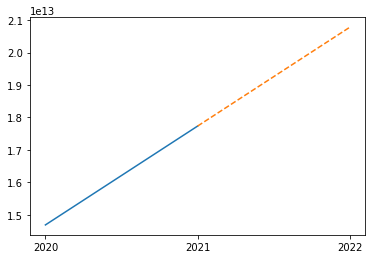

In [8]:
import matplotlib.pyplot as plt
plt.plot(GDP_2020_2021.columns, GDP_2020_2021.iloc[0, :])
plt.plot(GDP_2021_2022.columns, GDP_2021_2022.iloc[0, :], linestyle='dashed')
plt.show()

It seems totally a liner growth.

We want to find the top 10 countries and infer the GDP trend from 1960 until 2021.

In [9]:
type(df['1980'].head())

pandas.core.series.Series

From the above line we know the sorted column is a series. Next we know how to deal with sorted columns and put them in a new dataframe.

In [10]:
print(df.head())
print(df.info())

  Country Name Country Code     Indicator Name  Indicator Code           1960  \
0        Aruba          ABW  GDP (current US$)  NY.GDP.MKTP.CD            NaN   
2  Afghanistan          AFG  GDP (current US$)  NY.GDP.MKTP.CD   537,777,811    
4       Angola          AGO  GDP (current US$)  NY.GDP.MKTP.CD            NaN   
5      Albania          ALB  GDP (current US$)  NY.GDP.MKTP.CD            NaN   
6      Andorra          AND  GDP (current US$)  NY.GDP.MKTP.CD            NaN   

          1961         1962         1963         1964          1965  ...  \
0          NaN          NaN          NaN          NaN           NaN  ...   
2  548888896.0  546666678.0  751111191.0  800000044.0  1.006667e+09  ...   
4          NaN          NaN          NaN          NaN           NaN  ...   
5          NaN          NaN          NaN          NaN           NaN  ...   
6          NaN          NaN          NaN          NaN           NaN  ...   

           2013          2014          2015          201

In [11]:
d = {}
for i in range(1961,2022):
    l = df.sort_values(by=str(i), ascending=False)[str(i)]
    print(l)
    d[str(i)] = l.head(10).tolist()
    print(d[str(i)])
df1=pd.DataFrame(d)

251    5.633000e+11
81     7.774197e+10
77     6.746164e+10
119    5.350862e+10
40     5.005687e+10
           ...     
257             NaN
258             NaN
260             NaN
261             NaN
262             NaN
Name: 1961, Length: 216, dtype: float64
[563300000000.0, 77741965703.0, 67461644222.0, 53508617739.0, 50056868958.0, 44842760293.0, 40934952064.0, 39232435784.0, 19683055213.0, 17275940449.0]
251    6.051000e+11
81     8.124756e+10
77     7.560753e+10
119    6.072302e+10
116    5.038389e+10
           ...     
257             NaN
258             NaN
260             NaN
261             NaN
262             NaN
Name: 1962, Length: 216, dtype: float64
[605100000000.0, 81247564157.0, 75607529810.0, 60723018684.0, 50383891899.0, 47209359006.0, 42227447632.0, 42161481858.0, 24450604877.0, 19922723709.0]
251    6.386000e+11
81     8.656196e+10
77     8.475920e+10
119    6.949813e+10
116    5.771074e+10
           ...     
257             NaN
258             NaN
260             

In [12]:
print(df1)

           1961          1962          1963          1964          1965  \
0  5.633000e+11  6.051000e+11  6.386000e+11  6.858000e+11  7.437000e+11   
1  7.774197e+10  8.124756e+10  8.656196e+10  9.440756e+10  1.018248e+11   
2  6.746164e+10  7.560753e+10  8.475920e+10  9.400785e+10  1.015372e+11   
3  5.350862e+10  6.072302e+10  6.949813e+10  8.174901e+10  9.095028e+10   
4  5.005687e+10  5.038389e+10  5.771074e+10  6.317542e+10  7.043627e+10   
5  4.484276e+10  4.720936e+10  5.070680e+10  5.970834e+10  6.797815e+10   
6  4.093495e+10  4.222745e+10  4.842192e+10  5.648029e+10  5.955485e+10   
7  3.923244e+10  4.216148e+10  4.502999e+10  4.937752e+10  5.451518e+10   
8  1.968306e+10  2.445060e+10  2.328771e+10  2.560525e+10  2.834471e+10   
9  1.727594e+10  1.992272e+10  2.153993e+10  2.380110e+10  2.597715e+10   

           1966          1967          1968          1969          1970  ...  \
0  8.150000e+11  8.617000e+11  9.425000e+11  1.019900e+12  1.073303e+12  ...   
1  1.100459e+1

In [13]:
print(type(df1.iloc[0, 0]))

<class 'numpy.float64'>


In [14]:
l = df.sort_values(by='1991', ascending=False)['1991']
print(l.head(10))

251    6.158129e+12
119    3.584420e+12
55     1.868945e+12
77     1.269277e+12
116    1.246220e+12
81     1.142797e+12
35     6.103282e+11
70     5.771662e+11
202    5.179630e+11
40     3.833733e+11
Name: 1991, dtype: float64


Let's try to plot one line to see whether we will succeed.

In [15]:
s = df1.loc[0]
print(s)
print(type(s))

1961    5.633000e+11
1962    6.051000e+11
1963    6.386000e+11
1964    6.858000e+11
1965    7.437000e+11
            ...     
2017    1.947962e+13
2018    2.052716e+13
2019    2.137257e+13
2020    2.089374e+13
2021    2.299610e+13
Name: 0, Length: 61, dtype: float64
<class 'pandas.core.series.Series'>


In [16]:
print(s.index)

Index(['1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')


In [17]:
print(s.values)
print(type(s.values[0]))

[5.63300000e+11 6.05100000e+11 6.38600000e+11 6.85800000e+11
 7.43700000e+11 8.15000000e+11 8.61700000e+11 9.42500000e+11
 1.01990000e+12 1.07330300e+12 1.16485000e+12 1.27911000e+12
 1.42537600e+12 1.54524300e+12 1.68490400e+12 1.87341200e+12
 2.08182600e+12 2.35159900e+12 2.62733300e+12 2.85730700e+12
 3.20704100e+12 3.34378900e+12 3.63403800e+12 4.03761300e+12
 4.33897900e+12 4.57963100e+12 4.85521500e+12 5.23643800e+12
 5.64158000e+12 5.96314400e+12 6.15812900e+12 6.52032700e+12
 6.85855900e+12 7.28723600e+12 7.63974900e+12 8.07312200e+12
 8.57755446e+12 9.06281820e+12 9.63117449e+12 1.02509480e+13
 1.05819298e+13 1.09291130e+13 1.14564420e+13 1.22171932e+13
 1.30391992e+13 1.38155869e+13 1.44742269e+13 1.47698579e+13
 1.44780649e+13 1.50489644e+13 1.55997281e+13 1.62539722e+13
 1.68431910e+13 1.75506802e+13 1.82060207e+13 1.86951108e+13
 1.94796201e+13 2.05271560e+13 2.13725724e+13 2.08937438e+13
 2.29961000e+13]
<class 'numpy.float64'>


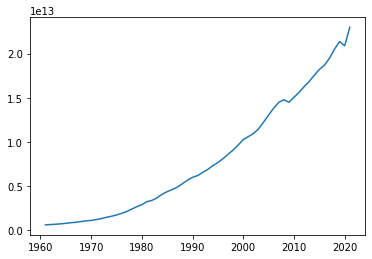

In [19]:
import matplotlib.pyplot as plt
import numpy as np
a = np.asarray(s.index, int)
p = plt.plot(a, s.values)

We will transpose the dataframe and draw all the lines.

In [20]:
t= df1.T
print(t.head())

                 0             1             2             3             4  \
1961  5.633000e+11  7.774197e+10  6.746164e+10  5.350862e+10  5.005687e+10   
1962  6.051000e+11  8.124756e+10  7.560753e+10  6.072302e+10  5.038389e+10   
1963  6.386000e+11  8.656196e+10  8.475920e+10  6.949813e+10  5.771074e+10   
1964  6.858000e+11  9.440756e+10  9.400785e+10  8.174901e+10  6.317542e+10   
1965  7.437000e+11  1.018248e+11  1.015372e+11  9.095028e+10  7.043627e+10   

                 5             6             7             8             9  
1961  4.484276e+10  4.093495e+10  3.923244e+10  1.968306e+10  1.727594e+10  
1962  4.720936e+10  4.222745e+10  4.216148e+10  2.445060e+10  1.992272e+10  
1963  5.070680e+10  4.842192e+10  4.502999e+10  2.328771e+10  2.153993e+10  
1964  5.970834e+10  5.648029e+10  4.937752e+10  2.560525e+10  2.380110e+10  
1965  6.797815e+10  5.955485e+10  5.451518e+10  2.834471e+10  2.597715e+10  


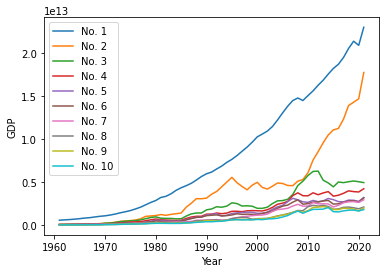

In [21]:
import matplotlib.pyplot as plt
import numpy as np
for i in range(10):
    s = df1.loc[i]
    x = np.asarray(s.index, int)
    plt.plot(x, s.values, label=f"No. {i+1}") 
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()   
plt.show()

From the plot, we can tell that after 1990, the difference of GDP all over the world became bigger and bigger.

Now we want to explore more about China's GDP.

In [22]:
China = df[df['Country Name']=='China']
China_GDP = China[China.columns[5:67]]

In [23]:
print(type(China_GDP))
print(China_GDP)

<class 'pandas.core.frame.DataFrame'>
            1961          1962          1963          1964          1965  \
40  5.005687e+10  4.720936e+10  5.070680e+10  5.970834e+10  7.043627e+10   

            1966          1967          1968          1969          1970  ...  \
40  7.672029e+10  7.288163e+10  7.084654e+10  7.970591e+10  9.260297e+10  ...   

            2013          2014          2015          2016          2017  \
40  9.570406e+12  1.047568e+13  1.106155e+13  1.123328e+13  1.231041e+13   

            2018          2019          2020          2021          2022  
40  1.389482e+13  1.427994e+13  1.468767e+13  1.773406e+13  2.078045e+13  

[1 rows x 62 columns]


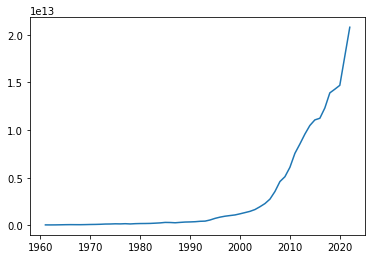

In [24]:
import numpy as np
x = np.asarray(China_GDP.columns, int)
plt.plot(x, China_GDP.iloc[0, :].tolist())
plt.show()

Next we want to analyze China's GDP and increase rate.

In [25]:
print(China_GDP.index)

Int64Index([40], dtype='int64')


In [26]:
import numpy as np
d1 = [np.nan]
for i in range(1962,2022):
    l = (China_GDP.loc[40,str(i)]/China_GDP.loc[40,str(i-1)] - 1)*100
    d1.append(l)
d1.append(np.nan)
print([f"{d:.2f}" for d in d1])

['nan', '-5.69', '7.41', '17.75', '17.97', '8.92', '-5.00', '-2.79', '12.51', '16.18', '7.77', '13.91', '21.86', '4.07', '13.35', '-5.81', '13.64', '-14.52', '19.22', '7.22', '2.47', '4.71', '12.48', '12.68', '19.06', '-2.82', '-9.24', '14.43', '11.34', '3.76', '6.24', '11.36', '4.17', '26.89', '30.16', '17.59', '11.33', '7.01', '6.31', '10.73', '10.57', '9.79', '12.90', '17.77', '16.91', '20.39', '29.00', '29.40', '11.04', '19.32', '24.06', '12.99', '12.17', '9.46', '5.59', '1.55', '9.59', '12.87', '2.77', '2.86', '20.74', 'nan']


In [27]:
China_GDP.loc['increase_rate'] = d1
print(China_GDP)

                       1961          1962          1963          1964  \
40             5.005687e+10  4.720936e+10  5.070680e+10  5.970834e+10   
increase_rate           NaN -5.688550e+00  7.408363e+00  1.775214e+01   

                       1965          1966          1967          1968  \
40             7.043627e+10  7.672029e+10  7.288163e+10  7.084654e+10   
increase_rate  1.796721e+01  8.921569e+00 -5.003442e+00 -2.792331e+00   

                       1969          1970  ...          2013          2014  \
40             7.970591e+10  9.260297e+10  ...  9.570406e+12  1.047568e+13   
increase_rate  1.250502e+01  1.618082e+01  ...  1.216770e+01  9.459125e+00   

                       2015          2016          2017          2018  \
40             1.106155e+13  1.123328e+13  1.231041e+13  1.389482e+13   
increase_rate  5.592668e+00  1.552435e+00  9.588768e+00  1.287048e+01   

                       2019          2020          2021          2022  
40             1.427994e+13  1.46

C:\Users\Chang\AppData\Local\Temp\ipykernel_29936\3954162713.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  China_GDP.loc['increase_rate'] = d1


In [28]:
China_GDP.index = ['GDP', 'Increase_rate(%)']

In [29]:
China_GDP_analysis = China_GDP.drop(['1961', '2022'], axis=1)
print(China_GDP_analysis)

                          1962          1963          1964          1965  \
GDP               4.720936e+10  5.070680e+10  5.970834e+10  7.043627e+10   
Increase_rate(%) -5.688550e+00  7.408363e+00  1.775214e+01  1.796721e+01   

                          1966          1967          1968          1969  \
GDP               7.672029e+10  7.288163e+10  7.084654e+10  7.970591e+10   
Increase_rate(%)  8.921569e+00 -5.003442e+00 -2.792331e+00  1.250502e+01   

                          1970          1971  ...          2012          2013  \
GDP               9.260297e+10  9.980096e+10  ...  8.532230e+12  9.570406e+12   
Increase_rate(%)  1.618082e+01  7.772953e+00  ...  1.298722e+01  1.216770e+01   

                          2014          2015          2016          2017  \
GDP               1.047568e+13  1.106155e+13  1.123328e+13  1.231041e+13   
Increase_rate(%)  9.459125e+00  5.592668e+00  1.552435e+00  9.588768e+00   

                          2018          2019          2020          2

In [30]:
China_GDP_increase = China_GDP_analysis.loc['Increase_rate(%)'].tolist()
print(type(China_GDP_increase))

<class 'list'>


We want to find when China began to develop really fast. (We set the standard: GDP increase rate exceeded 6% continuously for at least 1 0 years.)

We set different way to realize it, and find the most efficient way.(algorithm)

In [31]:
for i in range(len(China_GDP_increase)-9):
    for j in range(10):
        if China_GDP_increase[i+j] >= 6:
            continue
        else:
            break
    else:
        print(f"Sarting from year {i+1961}, GDP began to grow consistently above 6%. The GDP growth of next ten years is {China_GDP_increase[i:i+10]}.")
        break      
   
    

Sarting from year 1993, GDP began to grow consistently above 6%. The GDP growth of next ten years is [26.89115704137821, 30.164059319537962, 17.58888965517138, 11.329390139906014, 7.013193362800796, 6.312094204030738, 10.726681485693979, 10.570783024789844, 9.79204983022759, 12.902515972973294].


In [32]:
for i in range(len(China_GDP_increase)-9):
    for j in range(10):
        if China_GDP_increase[i+j] < 6:
            break
    else:
        print(f"Sarting from year {i+1961}, GDP began to grow consistently above 6%. The GDP growth of next ten years is {China_GDP_increase[i:i+10]}.")
        break      
   

Sarting from year 1993, GDP began to grow consistently above 6%. The GDP growth of next ten years is [26.89115704137821, 30.164059319537962, 17.58888965517138, 11.329390139906014, 7.013193362800796, 6.312094204030738, 10.726681485693979, 10.570783024789844, 9.79204983022759, 12.902515972973294].


In [33]:
for i in range(len(China_GDP_increase)-9):
    if all(e>=6 for e in China_GDP_increase[i:i+10]):
        print(f"Sarting from year {i+1961}, GDP began to grow consistently above 6%. The GDP growth of next ten years is {China_GDP_increase[i:i+10]}.")
        break 

Sarting from year 1993, GDP began to grow consistently above 6%. The GDP growth of next ten years is [26.89115704137821, 30.164059319537962, 17.58888965517138, 11.329390139906014, 7.013193362800796, 6.312094204030738, 10.726681485693979, 10.570783024789844, 9.79204983022759, 12.902515972973294].


In [34]:
for i in range(len(China_GDP_increase)-9):
    for j in range(10):
        if China_GDP_increase[i+j] < 6:
            break
    else:
        print(f"Sarting from year {i+1961}, GDP began to grow consistently above 6%. The GDP growth of next ten years is {China_GDP_increase[i:i+10]}.")
        break 

Sarting from year 1993, GDP began to grow consistently above 6%. The GDP growth of next ten years is [26.89115704137821, 30.164059319537962, 17.58888965517138, 11.329390139906014, 7.013193362800796, 6.312094204030738, 10.726681485693979, 10.570783024789844, 9.79204983022759, 12.902515972973294].


Below is an efficient way to find the year when China's GDP began to grow consistently above 6%.使用了双指针方法，避免每一列都算10次。

In [35]:
i = 0
while i < len(China_GDP_increase)-9:
    j = 0
    while j < 10:
        if China_GDP_increase[i+j] >= 6:
            j += 1
            print(f"j = {j}")
        else:
            i = i + j + 1
            print(f"i = {i}")
            break
    if j == 10:
        print(f"Sarting from year {i+1961}, GDP began to grow consistently above 6%. The GDP growth of next ten years is {China_GDP_increase[i:i+10]}.")
        break 

i = 1
j = 1
j = 2
j = 3
j = 4
i = 6
i = 7
j = 1
j = 2
j = 3
j = 4
j = 5
i = 13
j = 1
i = 15
j = 1
i = 17
j = 1
j = 2
i = 20
i = 21
j = 1
j = 2
j = 3
i = 25
i = 26
j = 1
j = 2
i = 29
j = 1
j = 2
i = 32
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
Sarting from year 1993, GDP began to grow consistently above 6%. The GDP growth of next ten years is [26.89115704137821, 30.164059319537962, 17.58888965517138, 11.329390139906014, 7.013193362800796, 6.312094204030738, 10.726681485693979, 10.570783024789844, 9.79204983022759, 12.902515972973294].


In [36]:
print(type(China.index))
print(China.index)
print(type(China))

<class 'pandas.core.indexes.numeric.Int64Index'>
Int64Index([40], dtype='int64')
<class 'pandas.core.frame.DataFrame'>


In [37]:
China_increase_rate = (China.loc[40,'2010']/China.loc[40,'2009'] - 1)*100
print(type(China_increase_rate))
print(China_increase_rate)

<class 'numpy.float64'>
19.316310402700854


We try to find a general way to get the GDP increase rate of an input country in an input country.

In [40]:
country = input("Enter the country name: ")
Country_Column = df[df['Country Name']==country]
Country_GDP = Country_Column[Country_Column.columns[5:67]]
year = int(input("Enter the year: "))
i = Country_GDP.index[0]
print(i)
increase_rate = (Country_GDP.loc[i,str(year)]/Country_GDP.loc[i,str(year-1)] - 1)*100
print(type(Country_GDP))
print(type(Country_GDP.loc[i,str(year)]))
print(increase_rate)
print(type(increase_rate))
print(f"The GDP increase rate of {country} in {year} is {increase_rate}%.")

Enter the country name: China
Enter the year: 2017
40
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.float64'>
9.588768073372078
<class 'numpy.float64'>
The GDP increase rate of China in 2017 is 9.588768073372078%.


We want to see when China will exceed China if we give input increase rate.

In [41]:
import math
increase_rate_China = float(input("Enter the increase rate of China(%): "))
increase_rate_US = float(input("Enter the increase rate of US(%): "))  
China_GDP_2021 = df[df['Country Name']=='China'].iloc[0, 65]
US_GDP_2021 = df[df['Country Name']=='United States'].iloc[0, 65]
a = math.log(US_GDP_2021/China_GDP_2021)
b = math.log((1+increase_rate_China/100)/(1+increase_rate_US/100))
year = int(a/b)
print(f"In {(year+2021)}, China will exceed US and be No.1.")

Enter the increase rate of China(%): 5.6
Enter the increase rate of US(%): 2.5
In 2036, China will exceed US and be No.1.


We want to see the result if we give input countries, increase rate and year.

In [63]:
def binary_search(A_GDP_2021, B_GDP_2021, X, year):
    low = 0
    high = 100
    while abs(high - low) >= 10**(-4):
        mid = (low + high)/2
        if A_GDP_2021*(1 + mid/100)**(year-2021) < B_GDP_2021*(1 + X/100)**(year-2021):
            low = mid
        else:
            high = mid
    if high >= low:
        return (high+low)/2
binary_search(China_GDP_2021, US_GDP_2021, 2.5, 2035)

4.420137405395508

In [62]:
def binary_search(A_GDP_2021, B_GDP_2021, X, year):
    low = 0
    high = 100
    while abs(high - low) >= 10**(-3):
        mid = (low + high)/2
        if A_GDP_2021*(1 + mid/100)**(year-2021) < B_GDP_2021*(1 + X/100)**(year-2021):
            low = mid
#             print(f"low = {low}, high = {high}")
        else:
            high = mid
#             print(f"low = {low}, high = {high}")
    if high >= low:
        return (high+low)/2
binary_search(China_GDP_2021, US_GDP_2021, 2.5, 2035)

4.4200897216796875

We want to write more to see whether our above analysis is right.

In [44]:
import math
A = input("Enter the country name: ")
B = input("Enter the country name: ")
increase_rate_B = float(input(f"Enter the increase rate of {B}(%): "))
n = int(input("Enter the year: ")) - 2021
A_GDP_2021 = df[df['Country Name']== A].iloc[0, 65]
B_GDP_2021 = df[df['Country Name']== B].iloc[0, 65]
a = A_GDP_2021 / B_GDP_2021
print(a)

Enter the country name: China
Enter the country name: United States
Enter the increase rate of United States(%): 2.5
Enter the year: 2015
0.7711769667626684


In [45]:
print(math.pow(0.77118, 1/13))

0.9802112297599285


In [46]:
print(0.9802112297599285 * 1.025)

1.0047165105039266


In [47]:
import math
A = input("Enter the country name: ")
B = input("Enter the country name: ")
increase_rate_B = float(input(f"Enter the increase rate of {B}(%): "))
n = int(input("Enter the year: ")) - 2021
A_GDP_2021 = df[df['Country Name']== A].iloc[0, 65]
B_GDP_2021 = df[df['Country Name']== B].iloc[0, 65]
a = B_GDP_2021 / A_GDP_2021
e = math.pow(a, 1/n)
c = e * (1 + increase_rate_B / 100)
increase_rate_A = (c - 1) * 100
print(f"If {A}'s GDP will exceed {B}in {year}, the increase rate of {A}'s GDP should be at least {increase_rate_A}.")

Enter the country name: China
Enter the country name: United States
Enter the increase rate of United States(%): 2.5
Enter the year: 2035
If China's GDP will exceed United Statesin 15, the increase rate of China's GDP should be at least 4.420144630946332.


In [48]:
China_GDP_2021 = df[df['Country Name']=='China'].iloc[0, 65]
US_GDP_2021 = df[df['Country Name']=='United States'].iloc[0, 65]

We want to visualize the two method to see whether they are right.

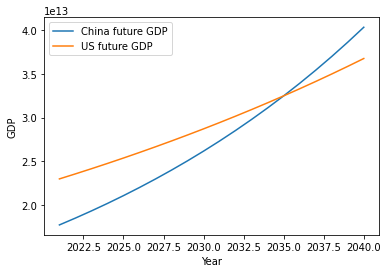

In [59]:
index_list = []
value_listA, value_listB = [], []
for i in range(20):
    index_list.append(int(i+2021))
    GDP_future_A = China_GDP_2021 * (1.044201446309**i)
    value_listA.append(GDP_future_A)
    GDP_future_B = US_GDP_2021 * (1.025**i)
    value_listB.append(GDP_future_B)
x = np.asarray(index_list, int)    
plt.plot(x, value_listA, label=f"China future GDP") 
plt.plot(x, value_listB, label=f"US future GDP") 
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()   
plt.show()

['2021-01-01T00:00:00.000000000' '2022-01-01T00:00:00.000000000'
 '2023-01-01T00:00:00.000000000' '2024-01-01T00:00:00.000000000'
 '2025-01-01T00:00:00.000000000' '2026-01-01T00:00:00.000000000'
 '2027-01-01T00:00:00.000000000' '2028-01-01T00:00:00.000000000'
 '2029-01-01T00:00:00.000000000' '2030-01-01T00:00:00.000000000'
 '2031-01-01T00:00:00.000000000' '2032-01-01T00:00:00.000000000'
 '2033-01-01T00:00:00.000000000' '2034-01-01T00:00:00.000000000'
 '2035-01-01T00:00:00.000000000' '2036-01-01T00:00:00.000000000'
 '2037-01-01T00:00:00.000000000' '2038-01-01T00:00:00.000000000'
 '2039-01-01T00:00:00.000000000' '2040-01-01T00:00:00.000000000']


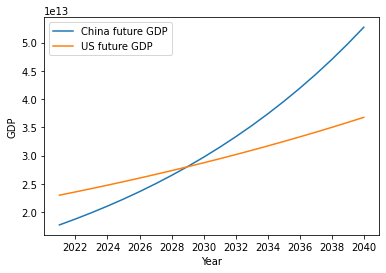

In [64]:
index_list = []
value_listA, value_listB = [], []
for i in range(20):
    index_list.append(int(i+2021))
    GDP_future_A = China_GDP_2021 * (1.059**i)
    value_listA.append(GDP_future_A)
    GDP_future_B = US_GDP_2021 * (1.025**i)
    value_listB.append(GDP_future_B)
m = np.asarray(index_list, int)
x = pd.to_datetime(m.astype(str)).values
print(x)
plt.plot(x, value_listA, label=f"China future GDP") 
plt.plot(x, value_listB, label=f"US future GDP") 
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()   
plt.show()

From the above two plots, we know that the binary_search method is not accurate, and we need to improve it.

We want to use linear regression to predict China's future GDP.

In [65]:
print(China_GDP.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, GDP to Increase_rate(%)
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1961    1 non-null      float64
 1   1962    2 non-null      float64
 2   1963    2 non-null      float64
 3   1964    2 non-null      float64
 4   1965    2 non-null      float64
 5   1966    2 non-null      float64
 6   1967    2 non-null      float64
 7   1968    2 non-null      float64
 8   1969    2 non-null      float64
 9   1970    2 non-null      float64
 10  1971    2 non-null      float64
 11  1972    2 non-null      float64
 12  1973    2 non-null      float64
 13  1974    2 non-null      float64
 14  1975    2 non-null      float64
 15  1976    2 non-null      float64
 16  1977    2 non-null      float64
 17  1978    2 non-null      float64
 18  1979    2 non-null      float64
 19  1980    2 non-null      float64
 20  1981    2 non-null      float64
 21  1982    2 non-null      float64

Because we use linear regression, we only slicing the data from 2000 to 2021.

In [66]:
f =  China_GDP.columns.get_loc('2000') 
g =  China_GDP.columns.get_loc('2022')

In [68]:
print(type(China_GDP.columns))

<class 'pandas.core.indexes.base.Index'>


In [74]:
import matplotlib.pyplot as plt
from scipy import stats
China_GDP_from2000 = China_GDP.iloc[0, f:g]
a = np.asarray(China_GDP.columns[f:g], int)
x = a.tolist()
y = China_GDP_from2000.tolist()


In [75]:
print(x)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]


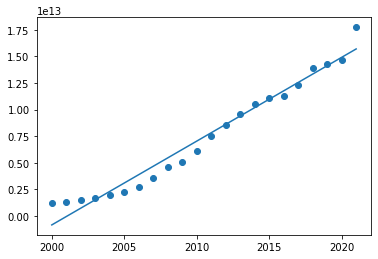

In [76]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

We use polyfit to do curve fitting.

In [83]:
import numpy as np
China_GDP_future = China_GDP.iloc[0, :g]
a = np.asarray(China_GDP.columns[:g], int)
x = a.tolist()
y = China_GDP_future.tolist()
p = np.polyfit(x, np.log(y), 1)
b = China_GDP_future.to_numpy()

In [84]:
print(type(a))
print(type(b))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [94]:
c = np.exp(p[1])
d = p[0]
x_fitted = np.linspace(np.min(x), np.max(x), 100)
y_fitted = c * np.exp(d * x_fitted)
print(d)

0.1012768278385151


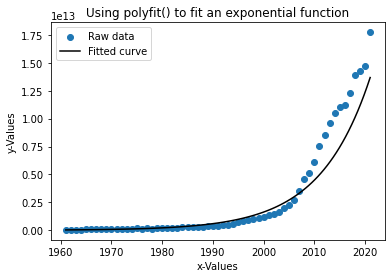

In [86]:
import matplotlib.pyplot as plt

ax = plt.axes()
ax.scatter(x, y, label='Raw data')
ax.plot(x_fitted, y_fitted, 'k', label='Fitted curve')
ax.set_title('Using polyfit() to fit an exponential function')
ax.set_ylabel('y-Values')
ax.set_xlabel('x-Values')
ax.legend()

Define a function to get the square error.

In [88]:
e = c * np.exp(d * a)
def square_error(b, e):
    f = e - b
    g = np.square(f)
    h= np.sum(g)
    return h
r1 = square_error(b, e)
print(r1)

1.2720869486611481e+26


We use weight to improve the fit.

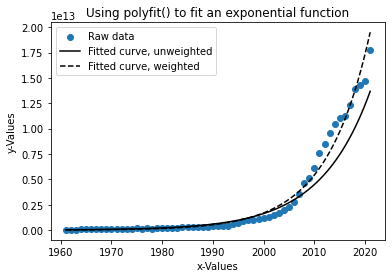

In [121]:
# Fit a weighted polynomial of degree 1 (a linear function) to the data
p_w = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))

# Convert the polynomial back into an exponential
a_w = np.exp(p_w[1])
b_w = p_w[0]
x_fitted_weighted = np.linspace(np.min(x), np.max(x), 100)
y_fitted_weighted = a_w * np.exp(b_w * x_fitted_weighted)

# Plot
ax = plt.axes()
ax.scatter(x, y, label='Raw data')
ax.plot(x_fitted, y_fitted, 'k', label='Fitted curve, unweighted')
ax.plot(x_fitted_weighted, y_fitted_weighted, 'k--', label='Fitted curve, weighted')
ax.set_title('Using polyfit() to fit an exponential function')
ax.set_ylabel('y-Values')

ax.set_xlabel('x-Values')
ax.legend()

Try to calculate the square error of weighted polyfit.

In [122]:
e_w = a_w * np.exp(b_w * a)
r_polyfit_weighted = square_error(b, e_w)
print(r_polyfit_weighted)

3.0031077942521076e+25


Try to calculate the square error of linear regression.

In [90]:
a_l = np.asarray(China_GDP.columns[f:g], int)
print(a_l)
b_l = China_GDP_from2000.to_numpy()
print(b_l)
e_l = myfunc(a_l)
print(type(e_l))

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020 2021]
[1.21134687e+12 1.33939572e+12 1.47055002e+12 1.66028797e+12
 1.95534700e+12 2.28596589e+12 2.75213177e+12 3.55034274e+12
 4.59430703e+12 5.10170307e+12 6.08716387e+12 7.55150012e+12
 8.53222999e+12 9.57040624e+12 1.04756829e+13 1.10615531e+13
 1.12332765e+13 1.23104094e+13 1.38948175e+13 1.42799375e+13
 1.46876739e+13 1.77340626e+13]
<class 'numpy.ndarray'>


In [91]:
r_l = square_error(b_l, e_l)
print(r_l)

1.8063345752247844e+25


We use curve_fit to do curve fitting.

In [116]:
from scipy.optimize import curve_fit

ac = a - 2000
print(ac)
bc = b/(10**13)
print(bc)

# Fit the function a * np.exp(b * t) + c to x and y
popt, pcov = curve_fit(lambda t, a_c, b_c, c_c: a_c * np.exp(b_c * t)+c_c, ac, bc)

a_c = popt[0]
b_c = popt[1]
c_c = popt[2]
print(a_c)
print(b_c)
print(c_c)

[-39 -38 -37 -36 -35 -34 -33 -32 -31 -30 -29 -28 -27 -26 -25 -24 -23 -22
 -21 -20 -19 -18 -17 -16 -15 -14 -13 -12 -11 -10  -9  -8  -7  -6  -5  -4
  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14
  15  16  17  18  19  20  21]
[0.00500569 0.00472094 0.00507068 0.00597083 0.00704363 0.00767203
 0.00728816 0.00708465 0.00797059 0.0092603  0.0099801  0.01136876
 0.01385443 0.01441821 0.01634316 0.01539405 0.01749381 0.01495408
 0.01782806 0.01911492 0.01958664 0.02050897 0.02306867 0.02599465
 0.0309488  0.03007581 0.0272973  0.03123536 0.03477681 0.03608579
 0.03833733 0.04269157 0.04447313 0.05643247 0.07345479 0.08637467
 0.0961604  0.10290431 0.10939973 0.12113469 0.13393957 0.147055
 0.1660288  0.1955347  0.22859659 0.27521318 0.35503427 0.4594307
 0.51017031 0.60871639 0.75515001 0.853223   0.95704062 1.04756829
 1.10615531 1.12332765 1.23104094 1.38948175 1.42799375 1.46876739
 1.77340626]
0.216441808168108
0.10221487700054466
-0.025211519952901926


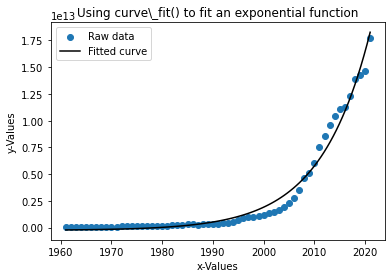

In [118]:
# Create the fitted curve
x_fitted_c = np.linspace(np.min(a), np.max(a), 100)
y_fitted_c = (a_c * np.exp(b_c * (x_fitted_c-2000)) + c_c) * (10**13)

# Plot
ax = plt.axes()
ax.scatter(a, b, label='Raw data')
ax.plot(x_fitted_c, y_fitted_c, 'k', label='Fitted curve')
ax.set_title(r'Using curve\_fit() to fit an exponential function')
ax.set_ylabel('y-Values')

ax.set_xlabel('x-Values')
ax.legend()

Calculate the square error for curve fitting.

In [119]:
e_c = (a_c * np.exp(b_c * (a - 2000)) + c_c) * (10**13)
r_c = square_error(b, e_c)
print(r_c)

2.4057290346163716e+25
